In [1]:
# INSTALLING REQUIRED PACKAGES
!pip install seaborn scikit-learn matplotlib numpy pandas

# **DATA COLLECTION AND DATA CLEANING**

In [2]:
# import all required python packages
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# connect with google drive
# from google.colab import drive
# drive.mount('/content/drive')
# root_path = "/content/drive/MyDrive/sentiment_analysis"

In [4]:
root_path = "data"

In [5]:
# load all the datasets
reddit_df = pd.read_csv("https://www.dropbox.com/scl/fi/x3ihbcwdoy5azxthkul1i/Reddit_Data37.25k.csv?rlkey=o1ex5vglm8ysk9j5abbtemfef&st=zs3a6mc5&raw=1")  # https://www.kaggle.com/code/chanchal24/twitter-and-reddit-sentimental-analysis-dataset
tw_df1 = pd.read_csv("https://www.dropbox.com/scl/fi/loyeb7lmtqg5gbhsp621o/Twitter_Data1600k.csv?rlkey=6in65v1qdng777553exb5gqtb&st=m4opzov5&raw=1")     # https://www.kaggle.com/code/chanchal24/twitter-and-reddit-sentimental-analysis-dataset
tw_df2 = pd.read_csv("https://www.dropbox.com/scl/fi/n91548wtveukns7g53tli/dataset937.csv?rlkey=ltbwyjjjrr65et8gttrg3aqo0&st=bgsrjdje&raw=1")            #
tw_df3 = pd.read_csv("https://www.dropbox.com/scl/fi/pt9nemxc8zizs3k1813hd/sentiment_analysis436k.csv?rlkey=mcncdyrhej31722fhcymim7gm&st=1ticvusi&raw=1", encoding='ISO-8859-1')
tw_df4 = pd.read_csv("https://www.dropbox.com/scl/fi/861vgdztbv28srdq80pqw/training.1600k.processed.noemoticon.csv?rlkey=gjsnx3c3lebtjnqtjlwhxhpe3&st=fgc9lpte&raw=1", encoding='ISO-8859-1',names=["label","id","timestamp","Query","user","text"]) # https://www.kaggle.com/datasets/kazanova/sentiment140/data
tw_df5 = pd.read_csv("https://www.dropbox.com/scl/fi/spjnzfuhllll3c3vxpfp3/twitter_training10k.csv?rlkey=4y1xuo9mblw25we27w4xa6nhx&st=qvc7kivv&raw=1", names=["id", "temp","label","text"])

In [6]:
# printing number of rows
print("number of rows in reddit_df ",len(reddit_df))
print("number of rows in tw_df1 ",len(tw_df1))
print("number of rows in tw_df2 ",len(tw_df2))
print("number of rows in tw_df3 ",len(tw_df3))
print("number of rows in tw_df4 ",len(tw_df4))
print("number of rows in tw_df5 ",len(tw_df5))
print("total is number of rows are ", len(reddit_df) + len(tw_df1) + len(tw_df2) + len(tw_df3) + len(tw_df4) + len(tw_df5))

number of rows in reddit_df  37249
number of rows in tw_df1  162980
number of rows in tw_df2  937854
number of rows in tw_df3  1048572
number of rows in tw_df4  1600000
number of rows in tw_df5  74682
total is number of rows are  3861337


## **Cleaning reddit_df**

In [7]:
# Rename column name
reddit_df = reddit_df.rename(columns={"clean_comment":"text","category":"label"})
reddit_df.head(10)

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [8]:
# Removing neutral type data
reddit_df = reddit_df[reddit_df["label"] != 0]

In [9]:
# Type : 1 for positive and 0 for negative sentiments
reddit_df["label"] = reddit_df["label"].replace({-1 : 0})

In [10]:
reddit_df["label"].value_counts()

label
1    15830
0     8277
Name: count, dtype: int64

## **Cleaning tw_df1**

In [11]:
# Rename column name as content and type
tw_df1 = tw_df1.rename(columns={"clean_text":"text","category":"label"})
tw_df1 = tw_df1[tw_df1["label"].isin([-1.0, 1.0])]

tw_df1["label"]  = tw_df1["label"].replace({-1.0:0, 1.0:1})

In [12]:
# Converting float to int data type
tw_df1["label"] = tw_df1["label"].astype(int)

In [13]:
# Drop all the null values
tw_df1 = tw_df1.dropna()

In [14]:
# Drop duplicates
tw_df1 = tw_df1.drop_duplicates()

## **Cleaning tw_df2**

In [15]:
# remove other languages except english
tw_df2 = tw_df2[tw_df2["Language"] == "en"]
tw_df2 = tw_df2.drop(columns=["Language"])

In [16]:
# Rename column name as content and type
tw_df2 = tw_df2.rename(columns={"Text":"text","Label":"label"})

In [17]:
tw_df2["label"] = tw_df2["label"].replace({"positive":1,"negative":0,"litigious":-1,"uncertainty":2})

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\3744228038.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tw_df2["label"] = tw_df2["label"].replace({"positive":1,"negative":0,"litigious":-1,"uncertainty":2})


In [18]:
# Remove other data except negative and positive
tw_df2 = tw_df2[tw_df2["label"].isin([1, 0])]

In [19]:
# Drop all null values
tw_df2 = tw_df2.dropna()

In [20]:
# Remove all the duplicates
tw_df2 = tw_df2.drop_duplicates()

## **Cleaning tw_df3 dataset**

In [21]:
# Rename column names
tw_df3.columns = tw_df3.columns.str.strip()
tw_df3 = tw_df3.rename(columns={"text of the tweet":"text","polarity of tweet":"label"})

In [22]:
# Remove unwanted columns
tw_df3 = tw_df3.drop(columns=["id of the tweet","date of the tweet","user","query"])

In [23]:
# Replacing positive data as 1
tw_df3["label"] = tw_df3["label"].replace({4:1})

In [24]:
tw_df3 = tw_df3.dropna()

In [25]:
# Remove duplicates
tw_df3 = tw_df3.drop_duplicates()

In [26]:
tw_df3["label"].value_counts()

label
0    790181
1    246727
Name: count, dtype: int64

## **Cleaning tw_df4 dataset**

In [27]:
# Drop all unwanted columns
tw_df4 = tw_df4.drop(columns=["id","timestamp","Query","user"])

In [28]:
# Replacing positive type as 1
tw_df4["label"] = tw_df4["label"].replace({4:1})

In [29]:
tw_df4["label"].value_counts()

label
0    800000
1    800000
Name: count, dtype: int64

In [30]:
# Drop all null values
tw_df4 = tw_df4.dropna()

In [31]:
# Drop duplicates
tw_df4 = tw_df4.drop_duplicates()

## **Cleaning tw_df5 dataset**

In [32]:
# Removing all neutral data
tw_df5 = tw_df5[tw_df5["label"].isin(["Positive", "Negative"])]

In [33]:
# Remove all unwanted columns
tw_df5 = tw_df5.drop(columns=["id","temp"])

In [34]:
# Replacing positive as 1 and negative as 0
tw_df5["label"] = tw_df5["label"].replace({"Positive":1,"Negative":0})

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\1699998729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tw_df5["label"] = tw_df5["label"].replace({"Positive":1,"Negative":0})


In [35]:
# Remove all null values
tw_df5 = tw_df5.dropna()

In [36]:
# Combine all dataframes
final_df = pd.concat([reddit_df, tw_df1,tw_df2,tw_df3,tw_df4,tw_df5],ignore_index=True)

In [37]:
final_df

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0
...,...,...
3285865,Just realized that the Windows partition of my...,1
3285866,Just realized that my Mac window partition is ...,1
3285867,Just realized the windows partition of my Mac ...,1
3285868,Just realized between the windows partition of...,1


In [38]:
# check total null values
final_df.isnull().sum()

text     0
label    0
dtype: int64

In [39]:
# Remove all null values
final_df.dropna(inplace=True)

In [40]:
# Remove all duplicates
final_df = final_df.drop_duplicates()

In [41]:
final_df

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0
...,...,...
3285865,Just realized that the Windows partition of my...,1
3285866,Just realized that my Mac window partition is ...,1
3285867,Just realized the windows partition of my Mac ...,1
3285868,Just realized between the windows partition of...,1


In [43]:
# Save the dataset
final_df.to_csv("final_data.csv", index=False)

# **Data Visualization**

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

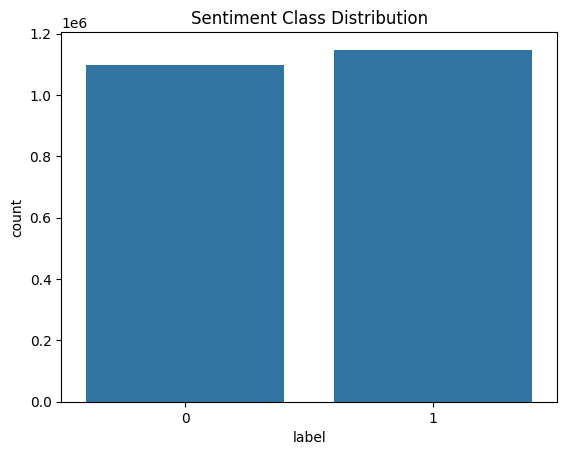

label
1    1147901
0    1098472
Name: count, dtype: int64


In [45]:
sns.countplot(x='label', data=final_df)
plt.title('Sentiment Class Distribution')
plt.show()
print(final_df["label"].value_counts())

# **Data Preprocessing**

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\merak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\merak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\merak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\merak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
df = final_df

In [48]:
df

,text,label
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0
...,...,...
3285865,Just realized that the Windows partition of my...,1
3285866,Just realized that my Mac window partition is ...,1
3285867,Just realized the windows partition of my Mac ...,1
3285868,Just realized between the windows partition of...,1


In [49]:
print("Initial data shape:", df.shape)

Initial data shape: (2246373, 2)


In [50]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation, numbers, symbols
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [51]:
df['text'] = df['text'].astype(str).apply(clean_text)

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\4280857927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str).apply(clean_text)


In [52]:
df

,text,label
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0
...,...,...
3285865,just realized that the windows partition of my...,1
3285866,just realized that my mac window partition is ...,1
3285867,just realized the windows partition of my mac ...,1
3285868,just realized between the windows partition of...,1


In [53]:
df['tokens'] = df['text'].apply(tokenize_and_remove_stopwords)

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\3628638990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['text'].apply(tokenize_and_remove_stopwords)


In [54]:
df['lemmatized'] = df['tokens'].apply(lemmatize_words)

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\520197145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized'] = df['tokens'].apply(lemmatize_words)


In [55]:
df['text'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))

C:\Users\merak\AppData\Local\Temp\ipykernel_18092\3349386058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))


In [56]:
df

,text,label,tokens,lemmatized
0,family mormon never tried explain still stare ...,1,"[family, mormon, never, tried, explain, still,...","[family, mormon, never, tried, explain, still,..."
1,buddhism much lot compatible christianity espe...,1,"[buddhism, much, lot, compatible, christianity...","[buddhism, much, lot, compatible, christianity..."
2,seriously say thing first get complex explain ...,0,"[seriously, say, thing, first, get, complex, e...","[seriously, say, thing, first, get, complex, e..."
3,benefit may want read living buddha living chr...,1,"[benefit, may, want, read, living, buddha, liv...","[benefit, may, want, read, living, buddha, liv..."
4,sit together watch simpson episode lisa become...,0,"[sit, together, watch, simpsons, episode, lisa...","[sit, together, watch, simpson, episode, lisa,..."
...,...,...,...,...
3285865,realized window partition mac like year behind...,1,"[realized, windows, partition, mac, like, year...","[realized, window, partition, mac, like, year,..."
3285866,realized mac window partition year behind nvid...,1,"[realized, mac, window, partition, years, behi...","[realized, mac, window, partition, year, behin..."
3285867,realized window partition mac year behind nvid...,1,"[realized, windows, partition, mac, years, beh...","[realized, window, partition, mac, year, behin..."
3285868,realized window partition mac like year behind...,1,"[realized, windows, partition, mac, like, year...","[realized, window, partition, mac, like, year,..."


In [57]:
df =  df[["text","label"]]

In [58]:
df

,text,label
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,0
3,benefit may want read living buddha living chr...,1
4,sit together watch simpson episode lisa become...,0
...,...,...
3285865,realized window partition mac like year behind...,1
3285866,realized mac window partition year behind nvid...,1
3285867,realized window partition mac year behind nvid...,1
3285868,realized window partition mac like year behind...,1


In [59]:
# label_encoder = LabelEncoder()
# df['label'] = label_encoder.fit_transform(df['label'])

In [60]:
# saving preprocessed and lemmatized data into csv
df.to_csv("preprocessed_lemmatized_data.csv", index=False)

# **Fit and Train Machine Learning Model**

In [61]:
# import required library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [62]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=30000, min_df=5, max_df=0.8)

In [63]:
X = df['text']
y = df['label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train = vectorizer.fit_transform(X_train)
X_test =  vectorizer.transform(X_test)

In [66]:
# Training LogisticRegression model
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
y_pred = lg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8158010127427522

Confusion Matrix:
 [[174090  45732]
 [ 37024 192429]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81    219822
           1       0.81      0.84      0.82    229453

    accuracy                           0.82    449275
   macro avg       0.82      0.82      0.82    449275
weighted avg       0.82      0.82      0.82    449275



In [68]:
# Training Support Vector Machine

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8144076567803684

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81    219822
           1       0.81      0.84      0.82    229453

    accuracy                           0.81    449275
   macro avg       0.81      0.81      0.81    449275
weighted avg       0.81      0.81      0.81    449275


Confusion Matrix for SVM:
 [[173750  46072]
 [ 37310 192143]]


In [69]:
# Training Random Forest

rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, max_depth=20)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for RF:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix for RF:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7518424127761394

Classification Report for RF:
               precision    recall  f1-score   support

           0       0.85      0.60      0.70    219822
           1       0.70      0.90      0.79    229453

    accuracy                           0.75    449275
   macro avg       0.78      0.75      0.74    449275
weighted avg       0.77      0.75      0.75    449275


Confusion Matrix for RF:
 [[131161  88661]
 [ 22830 206623]]


In [70]:
# Training Naive Bayes Classifier

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report for NB:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix for NB:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7854944076567804

Classification Report for NB:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78    219822
           1       0.79      0.80      0.79    229453

    accuracy                           0.79    449275
   macro avg       0.79      0.79      0.79    449275
weighted avg       0.79      0.79      0.79    449275


Confusion Matrix for NB:
 [[169679  50143]
 [ 46229 183224]]


In [71]:
# saving all the models

import os
import pickle

folder = 'models'
os.makedirs(folder, exist_ok=True)

# Save TF-IDF vectorizer
with open(os.path.join(folder, 'tfidf_vectorizer.pkl'), 'wb') as f:
    pickle.dump(vectorizer, f)

# Save Logistic Regression model
with open(os.path.join(folder, 'logistic_regression_model.pkl'), 'wb') as f:
    pickle.dump(lg_model, f)

# Save SVM model
with open(os.path.join(folder, 'svm_model.pkl'), 'wb') as f:
    pickle.dump(svm_model, f)

# Save Random Forest model
with open(os.path.join(folder, 'random_forest_model.pkl'), 'wb') as f:
    pickle.dump(rf_model, f)

# Save Naive Bayes model
with open(os.path.join(folder, 'naive_bayes_model.pkl'), 'wb') as f:
    pickle.dump(nb_model, f)

In [72]:
# load model for prediction

import pickle
import os

folder = 'models'

with open(os.path.join(folder, 'tfidf_vectorizer.pkl'), 'rb') as f:
    vectorizer = pickle.load(f)

with open(os.path.join(folder, 'logistic_regression_model.pkl'), 'rb') as f:
    lg_model = pickle.load(f)

with open(os.path.join(folder, 'svm_model.pkl'), 'rb') as f:
    svm_model = pickle.load(f)

with open(os.path.join(folder, 'random_forest_model.pkl'), 'rb') as f:
    rf_model = pickle.load(f)

with open(os.path.join(folder, 'naive_bayes_model.pkl'), 'rb') as f:
    nb_model = pickle.load(f)

# **Data Filtering / Data Pruning:**

To improve model accuracy perform data pruning with prebuild models

In [73]:
!pip install transformers

In [74]:
from transformers import pipeline

C:\Users\merak\tf-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# ❌ DON'T RUN THIS CODE THIS CODE WILL TAKE ARROUND 4 TO 5 HOURS

# using prebuild model distilber-base-uncased-finetunned-sst-2-english
classifier = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english",framework="pt")

# Make predictions using model
results = classifier(list(df["text"]), truncation=True, batch_size=32)

output = [[1,res["score"]] if res["label"] == "POSITIVE" else [0,res["score"]] for res in results]
prediction_only = [res[0] for res in output]
predictions = { "predictions": prediction_only, "prediction_scores": output }

def get_correct_classified(y_true, y_pred, confidence_threshold=0.85):
    misclassified = []
    i = 0
    for actual in y_true:
        if actual != y_pred[i][0] and y_pred[i][1] > confidence_threshold:
            misclassified.append(False)
        else:
          misclassified.append(True)
        i += 1

    return misclassified

# remove all rows which are being misclassified with the confidence of greater than 0.6
correct_data_mask = get_correct_classified(df["label"], predictions["prediction_scores"], confidence_threshold=0.60)
cleaned_df = df[correct_data_mask]
cleaned_df.to_csv("cleaned_data.csv", index=False)

Device set to use cpu


# **Train Machine Learning with cleaned data**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [76]:
cleaned_df = pd.read_csv("cleaned_data.csv")

In [77]:
cleaned_df = cleaned_df.dropna()

In [78]:
vectorizer1 = TfidfVectorizer(max_features=30000, min_df=5, max_df=0.8)

In [79]:
X1 = vectorizer1.fit_transform(cleaned_df['text'])
y1 = cleaned_df['label']

In [80]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [81]:
# Training LogisticRegression model
lg_model1 = LogisticRegression(max_iter=1000)
lg_model1.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [82]:
y_pred1 = lg_model1.predict(X_test1)

print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test1, y_pred1))
print("\nClassification Report:\n", classification_report(y_test1, y_pred1))

Accuracy: 0.9264579275578179

Confusion Matrix:
 [[173671  10664]
 [ 11802 109348]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94    184335
           1       0.91      0.90      0.91    121150

    accuracy                           0.93    305485
   macro avg       0.92      0.92      0.92    305485
weighted avg       0.93      0.93      0.93    305485



In [83]:
# Training Support Vector Machine

svm_model1 = LinearSVC(max_iter=1000)
svm_model1.fit(X_train1, y_train1)

y_pred_svm1 = svm_model1.predict(X_test1)

print("SVM Accuracy:", accuracy_score(y_test1, y_pred_svm1))
print("\nClassification Report for SVM:\n", classification_report(y_test1, y_pred_svm1))
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test1, y_pred_svm1))

SVM Accuracy: 0.9297608720559111

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94    184335
           1       0.91      0.91      0.91    121150

    accuracy                           0.93    305485
   macro avg       0.93      0.93      0.93    305485
weighted avg       0.93      0.93      0.93    305485


Confusion Matrix for SVM:
 [[173501  10834]
 [ 10623 110527]]


In [84]:
# Training Random Forest

rf_model1 = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, max_depth=20)
rf_model1.fit(X_train1, y_train1)

y_pred_rf1 = rf_model1.predict(X_test1)

print("Random Forest Accuracy:", accuracy_score(y_test1, y_pred_rf1))
print("\nClassification Report for RF:\n", classification_report(y_test1, y_pred_rf1))
print("\nConfusion Matrix for RF:\n", confusion_matrix(y_test1, y_pred_rf1))

Random Forest Accuracy: 0.6332356744193659

Classification Report for RF:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77    184335
           1       0.99      0.08      0.14    121150

    accuracy                           0.63    305485
   macro avg       0.81      0.54      0.45    305485
weighted avg       0.77      0.63      0.52    305485


Confusion Matrix for RF:
 [[184270     65]
 [111976   9174]]


In [85]:
# Training Naive Bayes Classifier

nb_model1 = MultinomialNB()
nb_model1.fit(X_train1, y_train1)

y_pred_nb1 = nb_model.predict(X_test1)

print("Naive Bayes Accuracy:", accuracy_score(y_test1, y_pred_nb1))
print("\nClassification Report for NB:\n", classification_report(y_test1, y_pred_nb1))
print("\nConfusion Matrix for NB:\n", confusion_matrix(y_test1, y_pred_nb1))

Naive Bayes Accuracy: 0.510070870910192

Classification Report for NB:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51    184335
           1       0.42      0.65      0.51    121150

    accuracy                           0.51    305485
   macro avg       0.53      0.53      0.51    305485
weighted avg       0.56      0.51      0.51    305485


Confusion Matrix for NB:
 [[ 77145 107190]
 [ 42476  78674]]


# **Finalizing the model**

In [86]:
# cross validation with svm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model1, X1, y1, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9223966636757979


In [87]:
# saving all the models

import os
import pickle

final_folder = 'models/final'
os.makedirs(final_folder, exist_ok=True)

# Save TF-IDF vectorizer
with open(os.path.join(final_folder, 'final_vectorizer.pkl'), 'wb') as f:
    pickle.dump(vectorizer1, f)

with open(os.path.join(final_folder,"svm.pkl"), 'wb') as f:
    pickle.dump(svm_model1,f)

with open(os.path.join(final_folder,"logistic.pkl"), 'wb') as f:
    pickle.dump(svm_model1,f)